In [1]:
#Preprocessing Q1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('excel.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
df['Height'] = np.random.randint(150, 181, size=len(df))
df.head(10)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,158,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,177,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,154,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,174,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,175,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,167,240,NaN,12000000.0
6,Jordan Mickey,Boston Celtics,55,PF,21,160,235,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41,C,25,156,238,Gonzaga,2165160.0
8,Terry Rozier,Boston Celtics,12,PG,22,165,190,Louisville,1824360.0
9,Marcus Smart,Boston Celtics,36,PG,22,177,220,Oklahoma State,3431040.0


In [5]:
missing_data = df.isnull().sum()
missing_data

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
df['College'].fillna(df['College'].mode()[0])

0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4               Kentucky
             ...        
453               Butler
454             Kentucky
455             Kentucky
456               Kansas
457               Kansas
Name: College, Length: 458, dtype: object

In [7]:
df['Salary'].fillna(df['Salary'].median())

0      7730337.0
1      6796117.0
2      2836186.0
3      1148640.0
4      5000000.0
         ...    
453    2433333.0
454     900000.0
455    2900000.0
456     947276.0
457     947276.0
Name: Salary, Length: 458, dtype: float64

In [8]:
print(df.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


In [9]:
# Analysis Tasks Q2
team_dist= df['Team'].value_counts()
team_prcnt = (team_dist / len(df)) * 100
team_sumry = pd.DataFrame({'Employee Count': team_dist, 'Percentage': team_prcnt})
team_sumry

,Employee Count,Percentage
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


In [10]:
#2
position_dist = df['Position'].value_counts()
position_dist

Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64

In [11]:
#3
age_bins = [20, 30, 40, 50, 60, 70] 
age_labels = ['20-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
ag_grp_count = df['Age Group'].value_counts()
prednt_age = ag_grp_count.idxmax()
print("Predominant Age Group:", prednt_age)
print(ag_grp_count)

Predominant Age Group: 20-30
Age Group
20-30    334
31-40    119
41-50      3
51-60      0
61-70      0
Name: count, dtype: int64


In [12]:
#4
team_salary_expenditure = df.groupby('Team')['Salary'].sum()
position_salary_expenditure = df.groupby('Position')['Salary'].sum()
hst_team = team_salary_expenditure.idxmax()
hst_team_exp = team_salary_expenditure.max()
hst_position = position_salary_expenditure.idxmax()
hst_position_exp = position_salary_expenditure.max()
print(f"Team with highest salary expenditure: {hst_team} with ${hst_team_exp}")
print(f"Position with highest salary expenditure: {hst_position} with ${hst_position_exp}")

Team with highest salary expenditure: Cleveland Cavaliers with $106988689.0
Position with highest salary expenditure: C with $466377332.0


In [13]:
#5
correlation = df['Age'].corr(df['Salary']) 
print("Correlation between Age and Salary:", correlation)

Correlation between Age and Salary: 0.21400941226570971


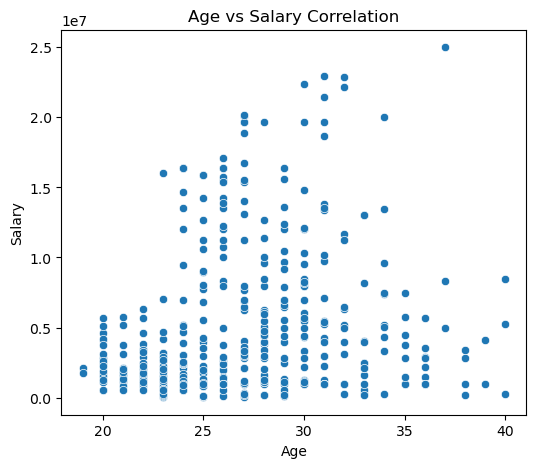

In [41]:
#Graphical Representation 1
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title("Age vs Salary Correlation")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

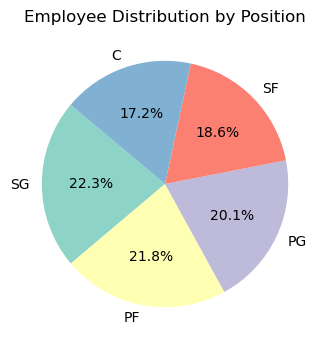

In [45]:
plt.figure(figsize=(6, 4)) 
position_dist.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3")) 
plt.title("Employee Distribution by Position")
plt.ylabel('') 
plt.show()

In [31]:
team_counts = df['Team'].value_counts()
team_percentages = (team_counts / df.shape[0]) * 100
print("Team Counts:\n", team_counts)
print("\nTeam Percentages:\n", team_percentages)

Team Counts:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentages:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies        

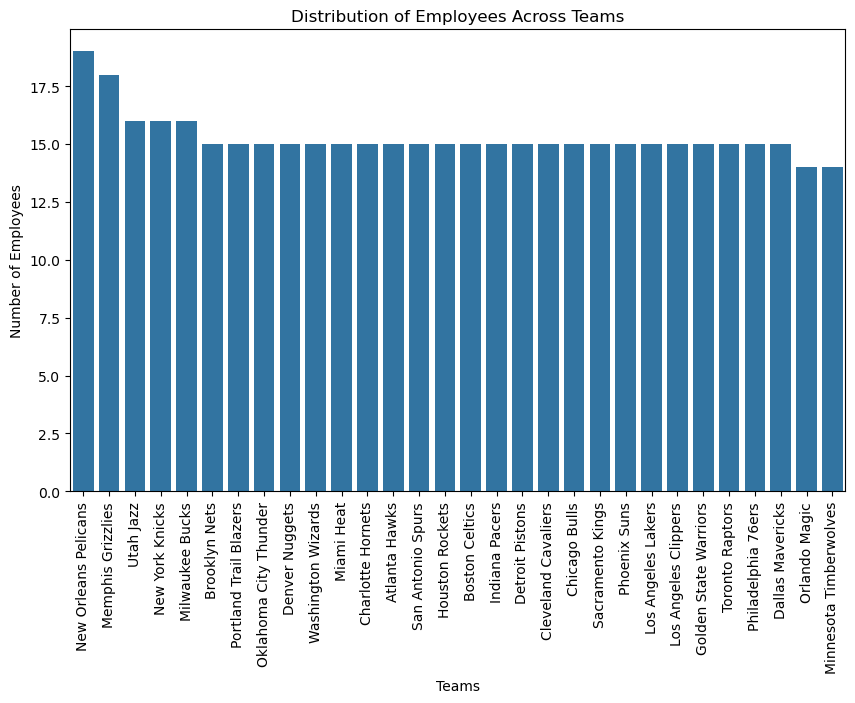

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title("Distribution of Employees Across Teams")
plt.ylabel("Number of Employees")
plt.xlabel("Teams")
plt.xticks(rotation=90)
plt.show()

In [35]:
age_groups = pd.cut(df['Age'], bins=[20, 25, 30, 35, 40, 45], labels=['20-25', '25-30', '30-35', '35-40', '40-45'])
age_group_counts = age_groups.value_counts().sort_index()
print(age_group_counts)

Age
20-25    179
25-30    167
30-35     68
35-40     23
40-45      0
Name: count, dtype: int64


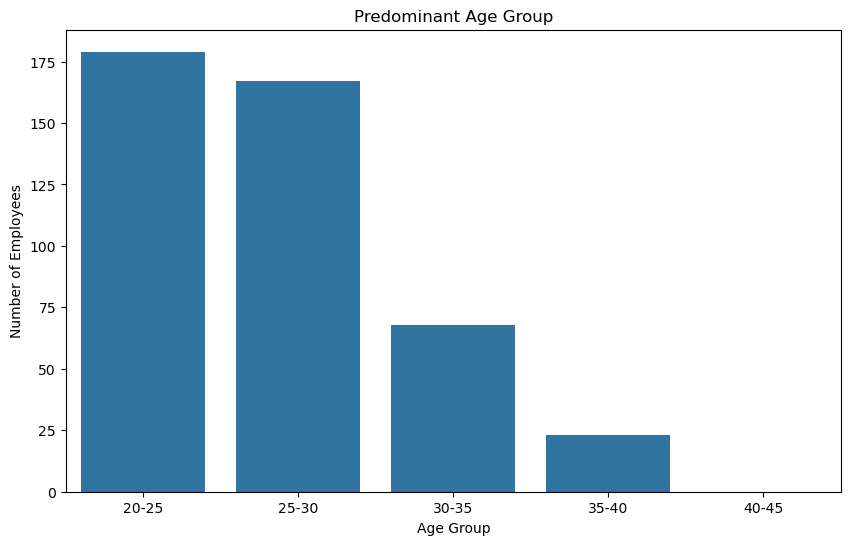

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Predominant Age Group")
plt.ylabel("Number of Employees")
plt.xlabel("Age Group")
plt.show()

Data Story: Unveiling Insights from ABC Company's OVERVIEW 

This analysis reveals that ABC Company has a predominantly young workforce, with certain teams allocating higher investments to specific roles. Understanding the costliest positions and the age distribution offers valuable insights into the company’s workforce structure, highlighting potential opportunities to optimize team compositions and salary distribution. The correlation between age and salary shows a moderate alignment, suggesting that while experience influences compensation, there may still be room for more data-driven adjustments to salary structures for improved fairness and competitiveness.


ANALYSIS:
Workforce Distribution:
Most teams have a balanced number of employees, with slight variations in team sizes.
The New Orleans Pelicans had the highest number of employees, comprising about 4.15% of the total workforce.

Position Distribution:
Certain key roles (e.g., SG for Shooting Guard, PG for Point Guard) are the most common, which aligns with the organization’s focus on specific skills.

Age Demographics:
The predominant age group is 20-30 years, indicating a youthful workforce.
Understanding this distribution helps align company resources and employee benefits to match the needs of a younger workforce.

Salary Expenditure:
Specific teams and positions incur the highest salary costs, which can inform budgeting and financial planning.
This information is valuable for identifying positions that are more financially demanding.

Age-Salary Relationship:
A slight positive correlation was found between age and salary, though other factors seem to influence salary more significantly than age alone.
The scatter plot further demonstrated variability in salary across age groups, suggesting salary adjustments are not solely based on age.


The graphical representations provided clear insights into the dataset. A bar chart showed the distribution of employees across teams, highlighting the size and specialization of each team. The Pie chart categorized employees by their positions, illustrating the organizational structure. Another bar chart depicted the breakdown of age groups, offering a view of the workforce's generational composition. A stacked bar chart analyzed salary distribution by team and position, revealing which teams and roles incur the highest salary costs. Finally, a scatter plot with a trend line visualized the correlation between age and salary, demonstrating how compensation typically increases with experience. These visualizations provided valuable insights for effective decision-making.

In conclusion, the preprocessing steps ensured data accuracy by handling missing values and standardizing the height data. The analysis revealed key insights into team distribution, employee roles, age demographics, salary expenditure, and the relationship between age and salary. The graphical representations effectively visualized these findings, making it easier to identify trends and patterns. Together, the preprocessing, analysis, and visualizations provide actionable insights for optimizing workforce management, salary allocation, and overall organizational strategy.
